In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [4]:
!pip install -Uqq fastbook

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
df = pd.read_csv(r'../input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv')

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()


,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

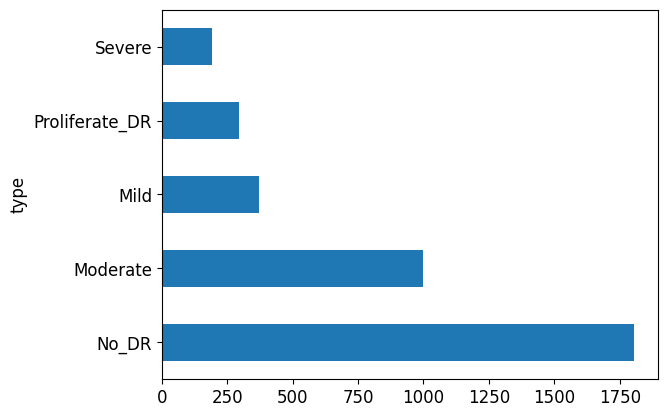

In [7]:
df['type'].value_counts().plot(kind='barh')

In [8]:
train, test = train_test_split(df, test_size = 0.2, stratify = df['type'])
#train, test = train_test_split(df, test_size = 0.2, stratify = train_a['type'])

print("For Training Dataset :")
print(train['type'].value_counts(), '\n')
print("For Testing Dataset :")
print(test['type'].value_counts(), '\n')

For Training Dataset :
type
No_DR             1444
Moderate           799
Mild               296
Proliferate_DR     236
Severe             154
Name: count, dtype: int64 

For Testing Dataset :
type
No_DR             361
Moderate          200
Mild               74
Proliferate_DR     59
Severe             39
Name: count, dtype: int64 



In [9]:
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
#val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

# if os.path.exists(val_dir):
#     shutil.rmtree(val_dir)
# os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [10]:
src_dir = r'../input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'
for index,row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

# for index, row in val.iterrows():
#     diagnosis = row['type']
#     binary_diagnosis = row['binary_type']
#     id_code = row['id_code'] + ".png"
#     srcfile = os.path.join(src_dir, diagnosis, id_code)
#     dstfile = os.path.join(val_dir, binary_diagnosis)
#     os.makedirs(dstfile, exist_ok = True)
#     shutil.copy(srcfile, dstfile)
 
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [11]:
train_path = 'train'
#val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
#val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2929 images belonging to 2 classes.
Found 733 images belonging to 2 classes.


In [10]:
model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=15,
                    validation_data=test_batches)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4844 - loss: 0.8738  

I0000 00:00:1711952863.265943     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711952863.288874     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/92 ━━━━━━━━━━━━━━━━━━━━ 49s 635ms/step - accuracy: 0.5565 - loss: 0.7798

W0000 00:00:1711952871.425497     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7386 - loss: 0.5630

W0000 00:00:1711952878.875553     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 208ms/step - accuracy: 0.7394 - loss: 0.5617 - val_accuracy: 0.5075 - val_loss: 0.8586
Epoch 2/15


W0000 00:00:1711952882.192145     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8728 - loss: 0.3096 - val_accuracy: 0.5075 - val_loss: 1.0735
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9060 - loss: 0.2604 - val_accuracy: 0.5075 - val_loss: 1.0926
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9185 - loss: 0.2128 - val_accuracy: 0.5252 - val_loss: 0.9379
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9223 - loss: 0.2096 - val_accuracy: 0.6521 - val_loss: 0.5913
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9362 - loss: 0.1876 - val_accuracy: 0.8458 - val_loss: 0.3262
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9400 - loss: 0.1796 - val_accuracy: 0.9086 - val_loss: 0.2295
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9403 - loss: 0.1804 - val_accuracy: 0.9209 - val_loss: 0.2166
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9566 - loss: 0.1421 - val_accuracy: 0.929

In [11]:
model.save('stage_1.keras')

In [12]:
loss, acc = model.evaluate(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9344 - loss: 0.2005
Loss:  0.19116491079330444
Accuracy:  0.9331514239311218


In [12]:
#gaussian blur
def preprocessing2(img):
    img_ben = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 10), -4, 128)
    return img_ben
def apply_gaussian_filter(image, sigmaX=10):
    # Applying Gaussian blur
    gaussian = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0,0), sigmaX), -4, 128)
    return gaussian

In [13]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class_gb(path):
    image = cv2.imread(path)
    img = apply_gaussian_filter(image)
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("stage_1.keras")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('Diabetic Retinopathy Not Detected')
    else:
        print('Diabetic Retinopathy Detected')
def predict_class(path):
    img = cv2.imread(path)
    #img = preprocessing2(image)
    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("/kaggle/working/stage_1.keras")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('Diabetic Retinopathy Not Detected')
    else:
        print('Diabetic Retinopathy Detected')

In [ ]:
predict_class('/kaggle/working/train/DR/dbb2c63f6f08.png')

In [ ]:
predict_class_gb('/kaggle/input/nodr-nr/Fundus_photograph_of_normal_right_eye.jpg')

**RESNET**

In [16]:
train_path = 'train'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 2929 images belonging to 2 classes.
Found 733 images belonging to 2 classes.


In [17]:
train_path=Path("/kaggle/working/train")
test_path=Path("/kaggle/working/test")

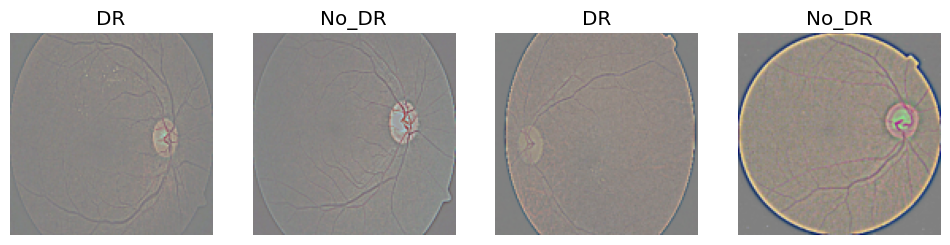

In [18]:
dc = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = dc.dataloaders(train_path)
dls.valid.show_batch(max_n=4,nrows=1)

In [19]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.490860,0.303987,0.097436,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.235881,0.167000,0.051282,00:05
1,0.140779,0.162379,0.041026,00:05
2,0.091622,0.157758,0.049573,00:05
3,0.068546,0.272051,0.044444,00:06
4,0.045253,0.175289,0.027350,00:06
5,0.026329,0.211852,0.032479,00:05
6,0.016209,0.197298,0.029060,00:05
7,0.008708,0.196820,0.030769,00:06


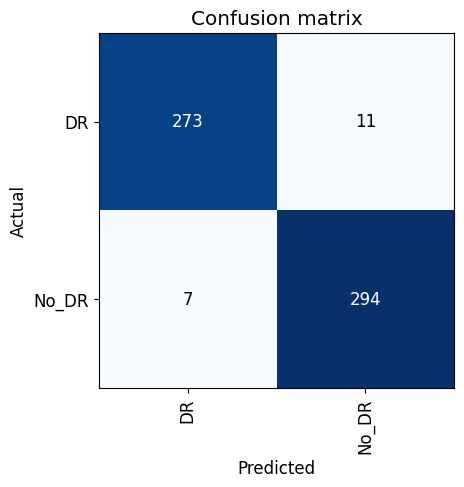

In [20]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [42]:
learn.export('/kaggle/working/stage-1_resnet.pkl')

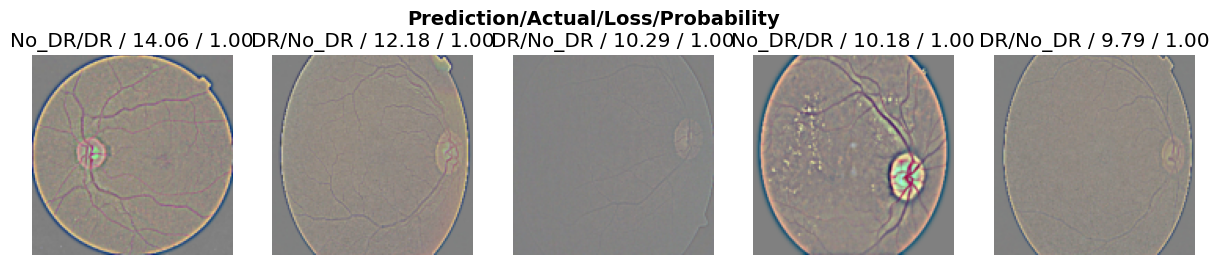

In [21]:
interp.plot_top_losses(5,nrows=1)


In [ ]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [22]:
#learn = load_learner('path_to_model_directory')  # Load the pre-trained model

test_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    #splitter=GrandparentSplitter(valid_name='test'),
    
    get_y=parent_label,
    item_tfms=Resize(224)
)


test_dl = test_db.dataloaders(test_path)
learn.test_dl = test_dl
results = learn.validate()
#print(f"loss:{results[0]}")
print(f"accuracy:{1-results[1]}")

accuracy:0.9692307692021132


In [23]:
def apply_gaussian_filter(image, sigmaX=10):
    # Applying Gaussian blur
    gaussian = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0,0), sigmaX), -4, 128)
    return gaussian

In [28]:
pred,idx,probs = learn.predict(PILImage.create('/kaggle/input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped/3088_right.jpeg'))
print(pred)
print(f"The probability of {pred} '{probs[idx]:.4f}'")

DR
The probability of DR '0.9364'


EVALUATION-2

In [35]:
base_dir = ''

test2_dir = os.path.join(base_dir, 'test2')

if os.path.exists(test2_dir):
    shutil.rmtree(test2_dir)
os.makedirs(test2_dir)

In [32]:
df_test2=pd.read_csv("/kaggle/input/diabetic-retinopathy-resized/trainLabels_cropped.csv")
df_test2.head()

,Unnamed: 0.1,Unnamed: 0,image,level
0,0,0,10_left,0
1,1,1,10_right,0
2,2,2,13_left,0
3,3,3,13_right,0
4,4,4,15_left,1


In [34]:
for binary_diagnosis in df['binary_type'].unique():
    dst_dir = os.path.join('/kaggle/working/test2', binary_diagnosis)
    os.makedirs(dst_dir, exist_ok=True)

In [31]:
import os
import random
import shutil

src_dir = r'/kaggle/input/diabetic-retinopathy-resized/resized_train_cropped/resized_train_cropped'
dst_dir = '/kaggle/working/test2'  # Specify the destination directory

# Get list of all image files in the source directory
all_files = [os.path.join(src_dir, filename) for filename in os.listdir(src_dir)]

# Select about 700 random files
num_files_to_copy = 700
random_files = random.sample(all_files, min(num_files_to_copy, len(all_files)))

# Copy selected files to the destination directory
for srcfile in random_files:
    shutil.copy(srcfile, dst_dir)

In [ ]:
import os
import pandas as pd
import random
import shutil

# Load the CSV files
data = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
#df = pd.read_csv(r'../input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv')

# Define diagnosis dictionaries
diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

# Map diagnosis to binary and type
df['type'] = df['diagnosis'].map(diagnosis_dict.get)

# Split the dataframe into train and test
#train, test = train_test_split(df, test_size=0.2, stratify=df['type'])

# Define source and destination directories
src_dir = '../input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'
dst_parent_dir = '/kaggle/working/test2'  # Specify the parent directory where subdirectories will be created

# Create 5 directories
for binary_diagnosis in df['binary_type'].unique():
    dst_dir = os.path.join(dst_parent_dir, binary_diagnosis)
    os.makedirs(dst_dir, exist_ok=True)

# Randomly copy approximately 700 files to each directory
for binary_diagnosis in test['binary_type'].unique():
    src_files = test[test['binary_type'] == binary_diagnosis]['id_code'].apply(lambda x: os.path.join(src_dir, binary_diagnosis, x + '.png')).tolist()
    dst_dir = os.path.join(dst_parent_dir, binary_diagnosis)
    num_files_to_copy = min(len(src_files), 700)
    random_files = random.sample(src_files, num_files_to_copy)
    for srcfile in random_files:
        shutil.copy(srcfile, dst_dir)


In [ ]:
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [43]:
%cd /kaggle/working

/kaggle/working


In [45]:
from IPython.display import FileLink 
FileLink(r'stage-1_resnet.pkl')

/kaggle/working/stage-1_resnet.pkl